In [ ]:
%%capture
%pip install wget

In [ ]:
#下載字型
import wget
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")


### R平方(R-squared)
R平方是評估回歸模型擬合優度的重要指標，它衡量模型能解釋的數據變異性比例。讓我們通過銷售額預測的例子來理解R平方的概念、計算和應用。

### 什麼是R平方?
R平方衡量模型解釋的數據變異性比例，範圍通常在0到1之間。

- **公式**：R² = 1 - (Σ(y_i - ŷ_i)² / Σ(y_i - ȳ)²)
    - y_i：實際值
    - ŷ_i：預測值
    - ȳ：實際值的平均值
- **特點**：值越接近1，表示模型解釋的變異性越多

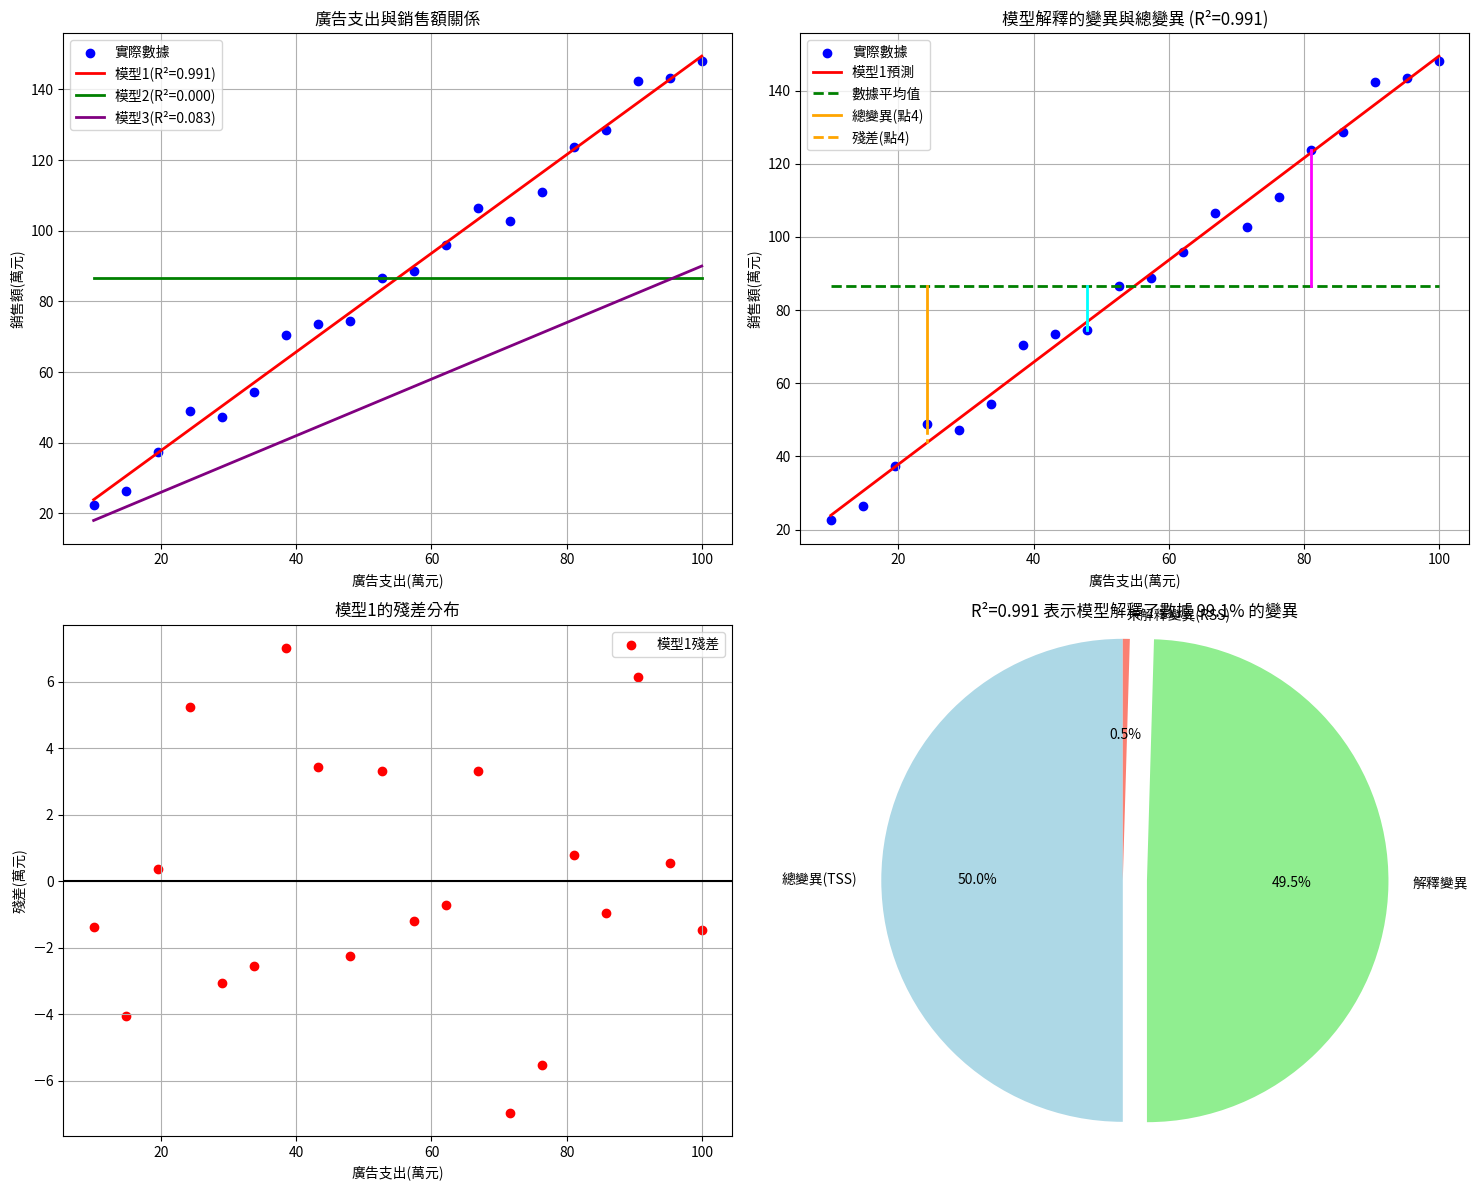

模型1的R²: 0.991
模型2的R²: 0.000
模型3的R²: 0.083
手動計算的R²: 0.991

R²的構成部分:
總變異(TSS): 29305.72
殘差平方和(RSS): 272.98
解釋變異: 29032.74
比例: 0.991 = 0.991

數據集部分詳情:
   廣告支出(萬元)  實際銷售額(萬元)  模型1預測(萬元)  模型2預測(萬元)  模型3預測(萬元)
0     10.00      22.48      23.87      86.64      18.00
1     14.74      26.41      30.48      86.64      21.79
2     19.47      37.45      37.09      86.64      25.58
3     24.21      48.93      43.70      86.64      29.37
4     28.95      47.25      50.30      86.64      33.16


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib as mlp
from matplotlib.font_manager import fontManager

fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

# 步驟1: 建立假數據集 - 假設我們有廣告支出和相應的銷售額數據
np.random.seed(42)  # 設定隨機種子以確保結果可重現
advertising_spend = np.linspace(10, 100, 20)  # 廣告支出(萬元)，20個數據點
noise = np.random.normal(0, 5, 20)  # 隨機噪聲

# 創建銷售額數據，假設與廣告支出有線性關係加上一些隨機因素
sales = 5 + 1.5 * advertising_spend + noise  # 銷售額(萬元)

# 步驟2: 建立模型 - 使用不同的模型來預測銷售額
# 模型1：使用線性回歸(較好的模型)
model1 = LinearRegression()
model1.fit(advertising_spend.reshape(-1, 1), sales)
sales_pred1 = model1.predict(advertising_spend.reshape(-1, 1))
r2_model1 = r2_score(sales, sales_pred1)

# 模型2：使用平均值作為預測(較差的模型)
sales_pred2 = np.full_like(sales, np.mean(sales))
r2_model2 = r2_score(sales, sales_pred2)  # 這應該接近於0

# 模型3：使用欠擬合的模型(中等模型)
# 假設我們只用了0.8倍的廣告支出係數，導致預測不夠準確
sales_pred3 = 10 + 0.8 * advertising_spend
r2_model3 = r2_score(sales, sales_pred3)

# 步驟3: 手動計算R平方
# 總平方和(Total Sum of Squares, TSS)
mean_sales = np.mean(sales)
tss = np.sum((sales - mean_sales) ** 2)

# 殘差平方和(Residual Sum of Squares, RSS)，對於模型1
rss_model1 = np.sum((sales - sales_pred1) ** 2)

# 計算R平方
r2_manual = 1 - (rss_model1 / tss)

# 步驟4: 創建數據框以便於展示
df = pd.DataFrame({
    '廣告支出(萬元)': advertising_spend,
    '實際銷售額(萬元)': sales,
    '模型1預測(萬元)': sales_pred1,
    '模型2預測(萬元)': sales_pred2,
    '模型3預測(萬元)': sales_pred3
})

# 步驟5: 視覺化結果
plt.figure(figsize=(15, 12))

# 繪製數據點和不同模型的預測
plt.subplot(2, 2, 1)
plt.scatter(advertising_spend, sales, color='blue', label='實際數據')
plt.plot(advertising_spend, sales_pred1, color='red', linewidth=2, label=f'模型1(R²={r2_model1:.3f})')
plt.plot(advertising_spend, sales_pred2, color='green', linewidth=2, label=f'模型2(R²={r2_model2:.3f})')
plt.plot(advertising_spend, sales_pred3, color='purple', linewidth=2, label=f'模型3(R²={r2_model3:.3f})')
plt.title('廣告支出與銷售額關係')
plt.xlabel('廣告支出(萬元)')
plt.ylabel('銷售額(萬元)')
plt.legend()
plt.grid(True)

# 繪製數據變異與模型1解釋的變異
plt.subplot(2, 2, 2)
plt.scatter(advertising_spend, sales, color='blue', label='實際數據')
plt.plot(advertising_spend, sales_pred1, color='red', linewidth=2, label='模型1預測')
plt.plot([min(advertising_spend), max(advertising_spend)], 
         [mean_sales, mean_sales], 'g--', linewidth=2, label='數據平均值')

# 對於某些點，繪製總變異和殘差變異
sample_points = [3, 8, 15]  # 選幾個樣本點來展示
colors = ['orange', 'cyan', 'magenta']
for i, idx in enumerate(sample_points):
    # 總變異(到平均值的距離)
    plt.plot([advertising_spend[idx], advertising_spend[idx]], 
             [sales[idx], mean_sales], 
             colors[i], linestyle='-', linewidth=2, 
             label=f'總變異(點{idx+1})' if i == 0 else "")
    
    # 殘差(到預測值的距離)
    plt.plot([advertising_spend[idx], advertising_spend[idx]], 
             [sales[idx], sales_pred1[idx]], 
             colors[i], linestyle='--', linewidth=2, 
             label=f'殘差(點{idx+1})' if i == 0 else "")

plt.title(f'模型解釋的變異與總變異 (R²={r2_model1:.3f})')
plt.xlabel('廣告支出(萬元)')
plt.ylabel('銷售額(萬元)')
plt.legend()
plt.grid(True)

# 繪製殘差圖(Residual Plot)
plt.subplot(2, 2, 3)
residuals1 = sales - sales_pred1
plt.scatter(advertising_spend, residuals1, color='red', label='模型1殘差')
plt.axhline(y=0, color='black', linestyle='-')
plt.title('模型1的殘差分布')
plt.xlabel('廣告支出(萬元)')
plt.ylabel('殘差(萬元)')
plt.legend()
plt.grid(True)

# 繪製R²的構成部分
plt.subplot(2, 2, 4)
explained_variance = tss - rss_model1
categories = ['總變異(TSS)', '解釋變異', '未解釋變異(RSS)']
values = [tss, explained_variance, rss_model1]
explode = (0, 0.1, 0)  # 突出顯示解釋變異
colors = ['lightblue', 'lightgreen', 'salmon']
plt.pie(values, explode=explode, labels=categories, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title(f'R²={r2_model1:.3f} 表示模型解釋了數據 {r2_model1*100:.1f}% 的變異')

plt.tight_layout()
plt.show()

# 輸出結果
print(f"模型1的R²: {r2_model1:.3f}")
print(f"模型2的R²: {r2_model2:.3f}")
print(f"模型3的R²: {r2_model3:.3f}")
print(f"手動計算的R²: {r2_manual:.3f}")

print("\nR²的構成部分:")
print(f"總變異(TSS): {tss:.2f}")
print(f"殘差平方和(RSS): {rss_model1:.2f}")
print(f"解釋變異: {tss - rss_model1:.2f}")
print(f"比例: {(tss - rss_model1) / tss:.3f} = {r2_model1:.3f}")

print("\n數據集部分詳情:")
print(df.head().round(2))


### R平方的特點與應用
R平方是評估回歸模型的常用指標，它告訴我們模型能解釋數據變異性的比例。讓我們深入理解它的特點：

**R平方的直觀解釋**  
- **R² = 1**：模型完美解釋了所有數據變異，預測值與實際值完全一致    
- **R² = 0**：模型沒有解釋任何數據變異，預測效果與使用平均值相同  
- **0 < R² < 1**：模型解釋了部分數據變異，R²越高表示模型越好  
- **R² < 0**：模型效果比使用平均值更差(在測試集上可能出現)  

### R平方的數學理解
R平方可以通過以下比例來理解：

1. **總變異(TSS)**：數據點到平均值的平方和，反映數據的總變異性
2. **殘差平方和(RSS)**：數據點到預測值的平方和，反映未被模型解釋的變異
3. **R² = 1 - (RSS/TSS)**：表示被模型解釋的變異比例

### 與其他指標的比較

### 與其他指標的比較

| 特性         | R平方       | MSE         | RMSE        | MAE         |
|--------------|-------------|-------------|-------------|-------------|
| 範圍         | 通常為0到1  | 0到∞        | 0到∞        | 0到∞        |
| 單位         | 無單位(比例) | 原始單位的平方 | 與原始單位相同 | 與原始單位相同 |
| 解釋方式     | 解釋的變異比例 | 平均平方誤差   | 平均誤差(保留單位) | 平均絕對誤差   |
| 適用場景     | 模型比較     | 大誤差懲罰   | 誤差度量(保留單位) | 均勻處理誤差   |

### 常見應用場景
1. **銷售預測**：評估營銷支出、季節性等因素對銷售額的影響程度
2. **房價預測**：評估位置、面積、房齡等因素能解釋多少房價變異
3. **模型選擇**：比較不同預測模型的表現
4. **變量重要性**：評估添加或移除某個特徵對模型解釋能力的影響


### R平方的局限性
1. 不能單獨作為模型評估的標準：高R²不一定意味著好的預測模型
2. 對異常值敏感：極端值可能顯著影響R²值
3. 更多特徵通常會提高R²：即使加入無關特徵，R²也可能增加(可使用調整後的R²解決)
4. 不適用於非線性關係：在數據關係非線性時可能產生誤導


### 學習重點
- R²衡量模型解釋的數據變異性比例，範圍通常在0到1之間
- R²越接近1，表示模型擬合得越好，能解釋更多的數據變異
- R²可用於比較不同模型的擬合優度，但不應作為唯一的評估標準
- 在我們的銷售額預測例子中，一個好的模型(模型1)解釋了大部分數據變異，而弱模型(模型2)幾乎無法解釋任何變異
- 當考慮多個自變量時，應考慮使用調整後的R²，以避免過擬合
